# 숫자 손글씨 분류하기

--
## 문제 정의
28x28 픽셀의 손글씨 숫자 이미지를 입력 받아서 실제로 의미하는 숫자를 인식해보자

## 가설
784개의 특징 데이터를 구성한 후 머신러닝 분석을 한 후 어떤 숫자인지 추측이 가능

## 목표
28x28 사이즈의 이미지로부터 label값을 얻어낸다

# 데이터 구성
784개 입력특징(28x28픽셀)
**출력 데이터** label
데이터의 총 행수 10000개

# 분석단계
## 단계1) 데이터를 불러온다
## 단계2) EDA & Feature Engnieering
## 단계3) 데이터셋 구성한다
## 단계4) 모델링하고 학습
## 단계5) 모델 검증

---
1. 데이터를 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## 2. EDA& Feature Engineering

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [4]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


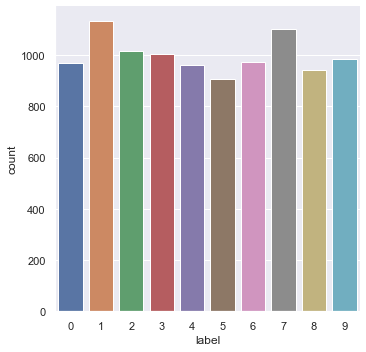

In [5]:
sns.catplot(data=df, x='label', kind='count')

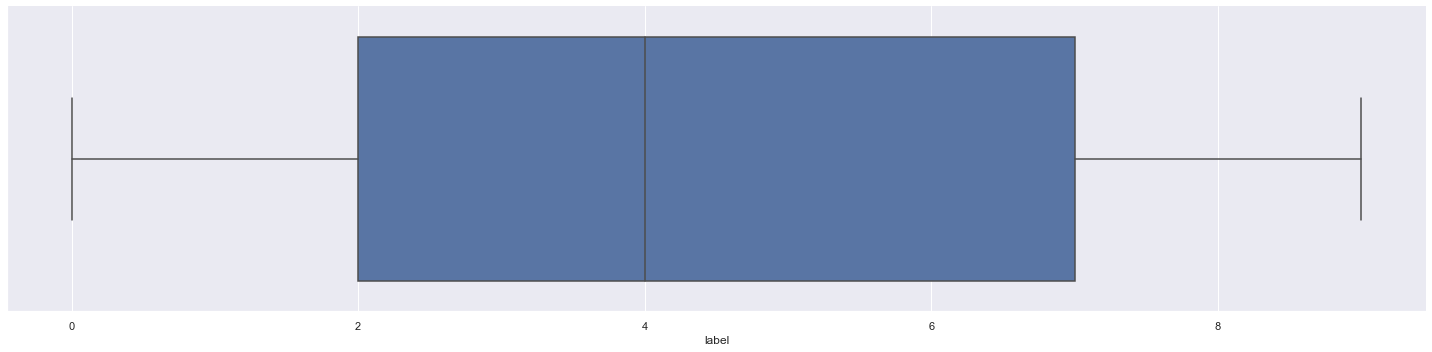

In [23]:
sns.catplot(data=df, x='label', kind='box', aspect=4)

## 이미지 살펴보기

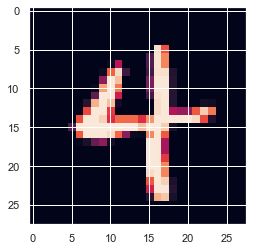

In [6]:
numbers = df.drop(['label'], axis = 1)

nth = 0 # 0~9999 바꾸시면서 살펴보셔요
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

---
# 3. data set 구성하기

In [7]:
input_data = df.drop('label', axis = 1)
target_data = df['label']

print(input_data.shape, target_data.shape)

(10000, 784) (10000,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

print(x_train.shape, x_test.shape)

(8000, 784) (2000, 784)


## validation set 만들기
### 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

In [9]:
x_valid = x_train[0:1600]
y_valid = y_train[0:1600]

x_train = x_train[1600:]
y_train = y_train[1600:]

---
# 4. 모델링 & 학습

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [11]:
forest.fit(x_train, y_train) # 데이터 학습

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
print('training set accuracy:', forest.score(x_train, y_train)) # 학습 1번 시키면 100% 맞춤
print('validation set accuracy: ', forest.score(x_valid, y_valid))

training set accuracy: 1.0
validation set accuracy:  0.95


## SVM

In [13]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
print('training set accuracy:', model.score(x_train, y_train))

training set accuracy: 0.9175


---
# 5. 모델 검증

In [15]:
print('RT: test set accuracy:', forest.score(x_test, y_test))

RT: test set accuracy: 0.9485


In [16]:
print('SVM: test set accuracy:', model.score(x_test, y_test))

SVM: test set accuracy: 0.9265


## 실제 예측 결과물 살펴보기

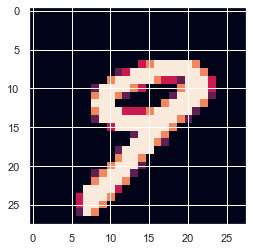

---인식된 숫자는? [9] 입니다


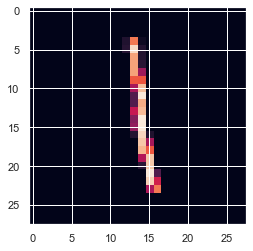

---인식된 숫자는? [1] 입니다


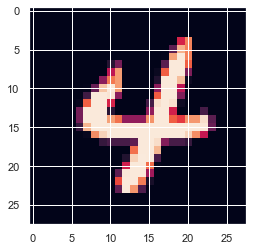

---인식된 숫자는? [4] 입니다


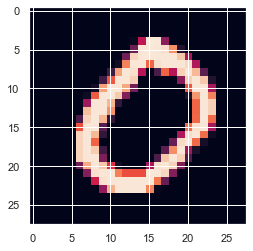

---인식된 숫자는? [0] 입니다


In [17]:
import random

for i in range(4):
    n = random.randrange(0, len(x_test))
    
    img = np.reshape(x_test.iloc[n].values, [28,28])
    plt.imshow(img)
    plt.show()

    result = forest.predict([x_test.iloc[n].values])
    print('---인식된 숫자는?', result, '입니다')